In [4]:
import tensorflow as tf
In [2]: tf.__version__

'1.3.0'

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/", one_hot=True)

Extracting /data/train-images-idx3-ubyte.gz
Extracting /data/train-labels-idx1-ubyte.gz
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz


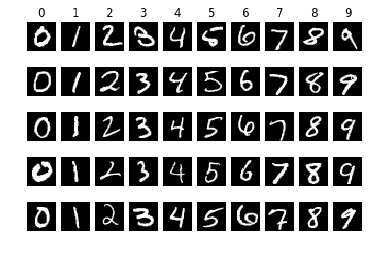

In [44]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for i in range(10):
    image = mnist.test.images[0]
    digits = np.argmax(mnist.test.labels, 1)
    
    idxs = (digits == i)

    images = mnist.test.images[idxs][0:5]

    for j in range(5):   
        plt.subplot(5, 10, i + j*10 + 1)
        plt.imshow(images[j].reshape(28, 28), cmap='gray')
        if j == 0:
            plt.title(i)
        plt.axis('off')
plt.show()

In [52]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.01)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

Initialising...
0  0.09872  0.09745


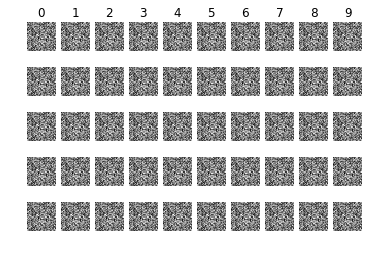

100  0.06609  0.06704


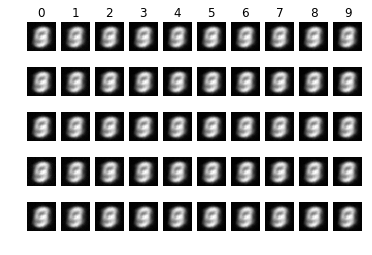

200  0.05732  0.06164


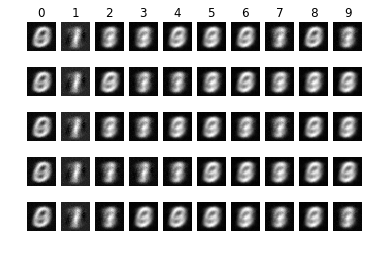

300  0.06306  0.06024


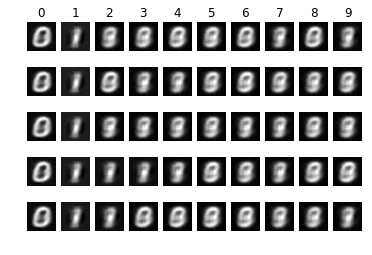

400  0.05494  0.05832


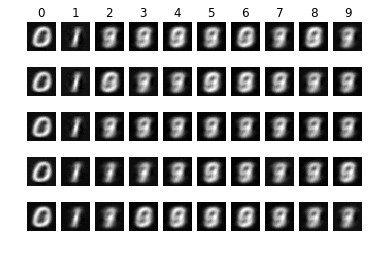

500  0.05553  0.05715


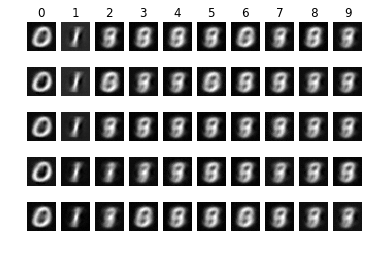

600  0.05620  0.05531


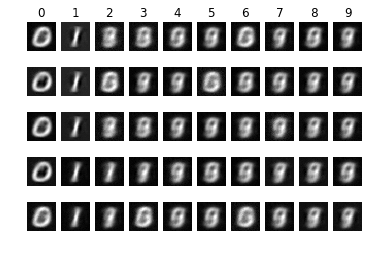

700  0.05005  0.05122


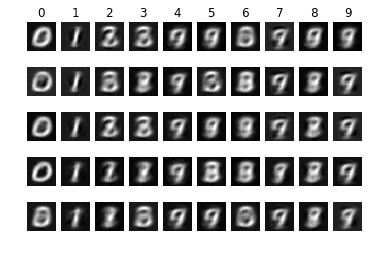

800  0.05014  0.05029


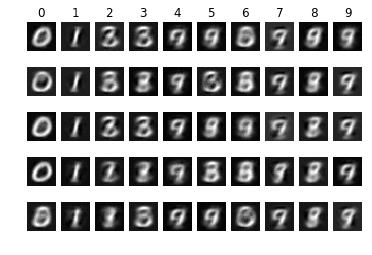

900  0.05037  0.04928


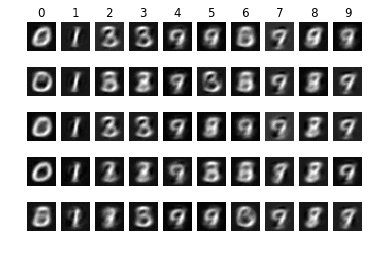

1000  0.04844  0.04847


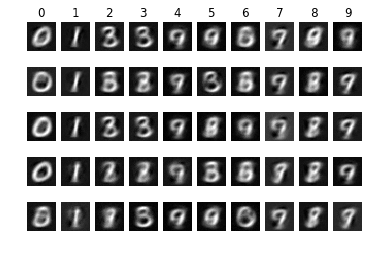

1100  0.04954  0.04775


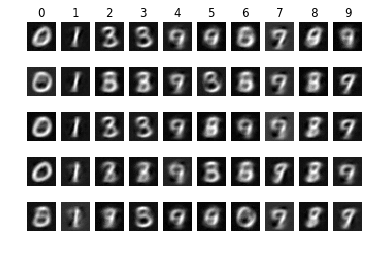

1200  0.04843  0.04721


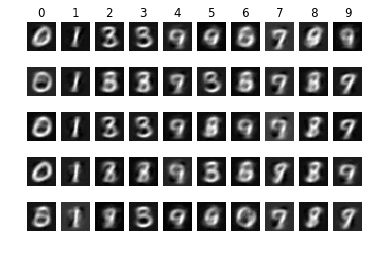

1300  0.04734  0.04671


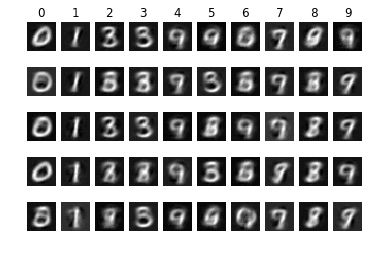

1400  0.04237  0.04617


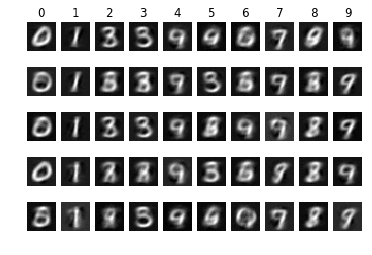

1500  0.04306  0.04569


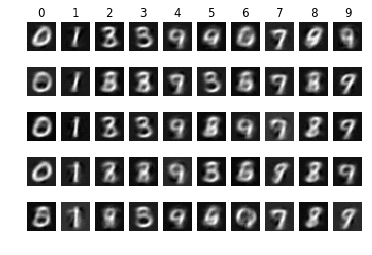

1600  0.04418  0.04542


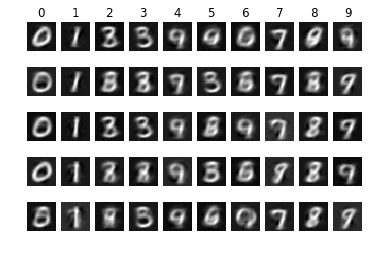

1700  0.04586  0.04512


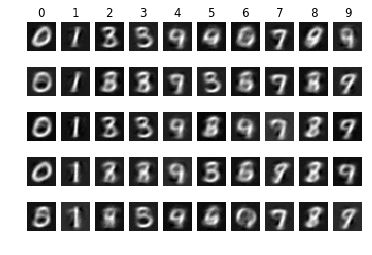

1800  0.04481  0.04480


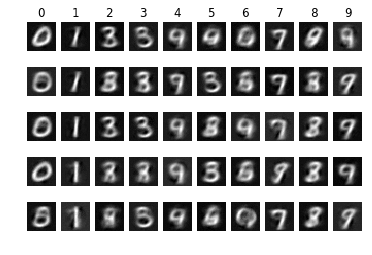

1900  0.04328  0.04462


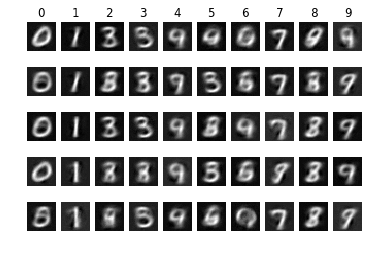

2000  0.04347  0.04425


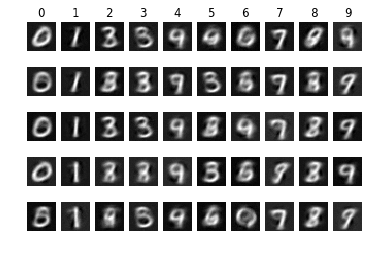

2100  0.04559  0.04398


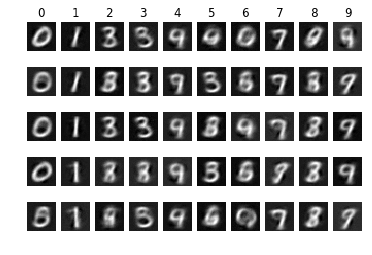

2200  0.04524  0.04383


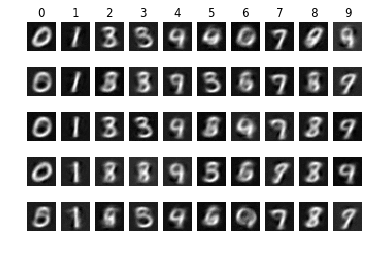

2300  0.04671  0.04347


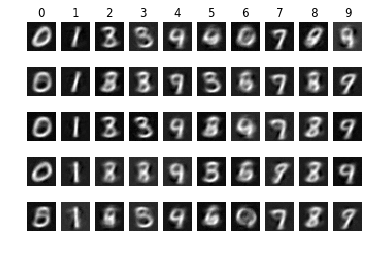

2400  0.04155  0.04323


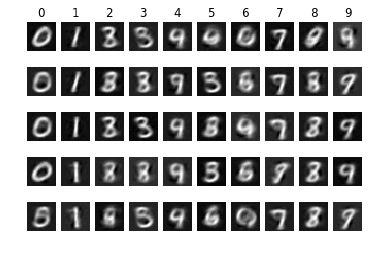

2500  0.04641  0.04297


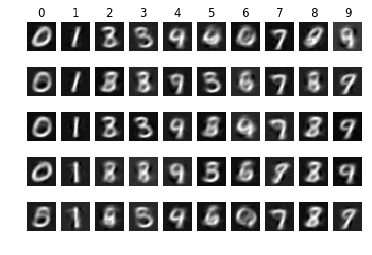

2600  0.04276  0.04274


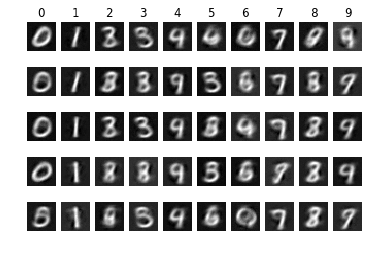

2700  0.04343  0.04271


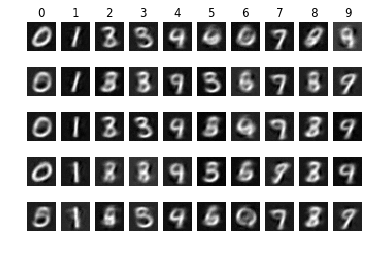

2800  0.03988  0.04246


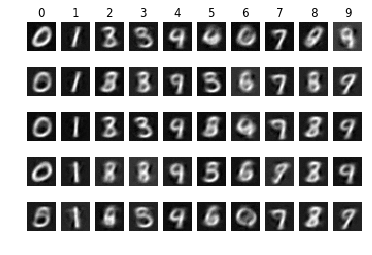

2900  0.03763  0.04219


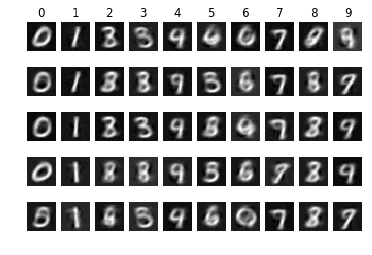

3000  0.04656  0.04204


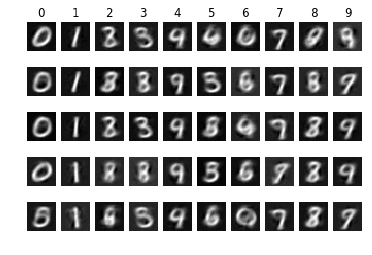

3100  0.04830  0.04189


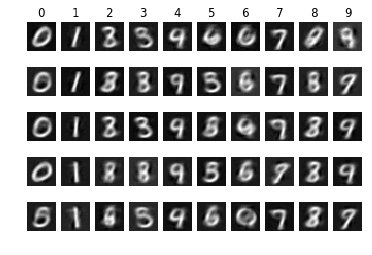

3200  0.04113  0.04175


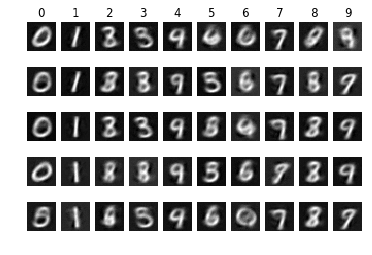

3300  0.04632  0.04158


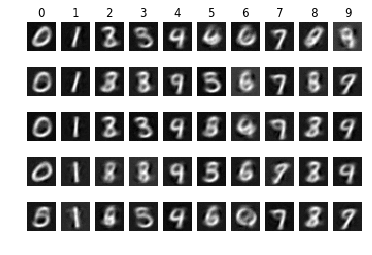

3400  0.04297  0.04149


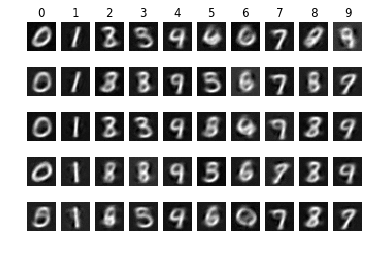

3500  0.04492  0.04124


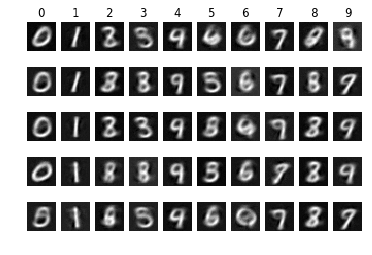

3600  0.04236  0.04124


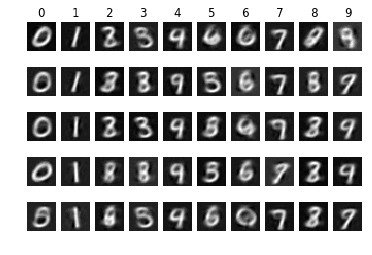

3700  0.04420  0.04106


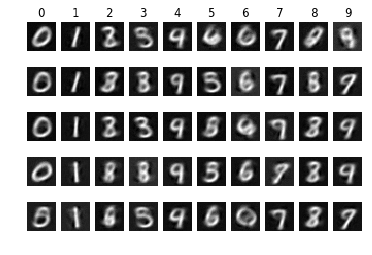

3800  0.03914  0.04088


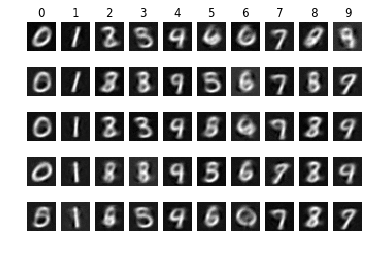

3900  0.03595  0.04079


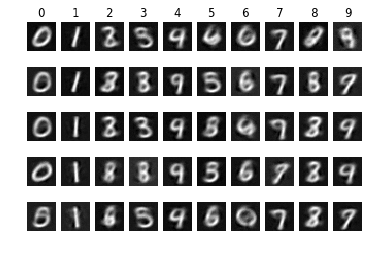

4000  0.03870  0.04072


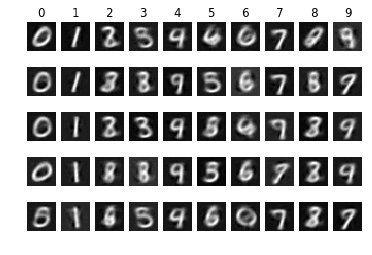

4100  0.04024  0.04053


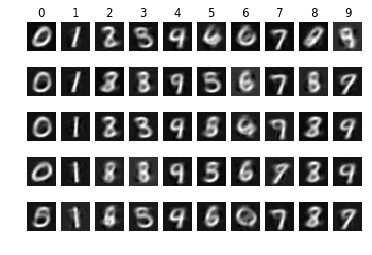

4200  0.04179  0.04050


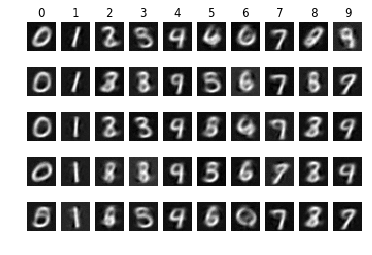

4300  0.04012  0.04045


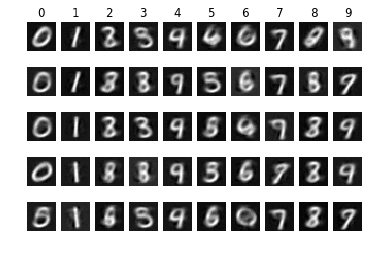

4400  0.04245  0.04027


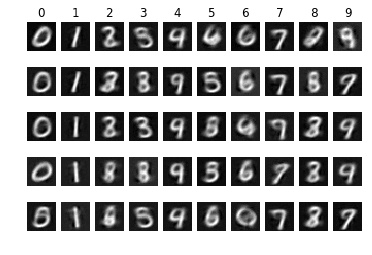

4500  0.03778  0.04027


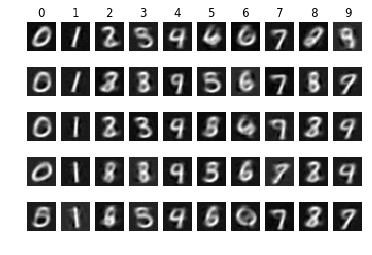

4600  0.04105  0.04014


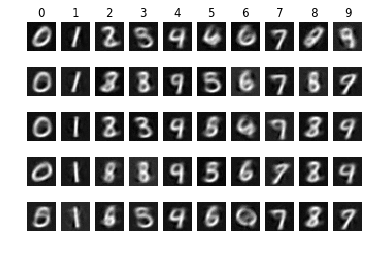

4700  0.03734  0.04001


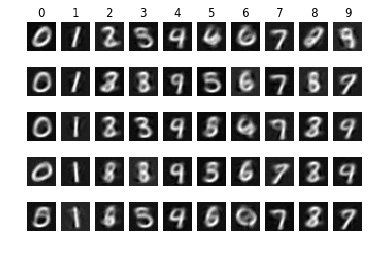

4800  0.03602  0.03992


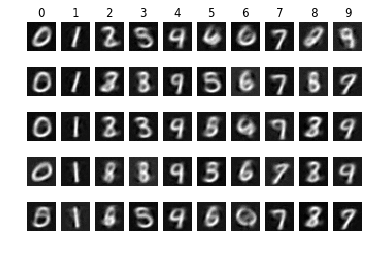

4900  0.03950  0.03985


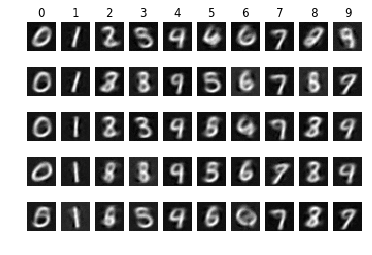

5000  0.03927  0.03980


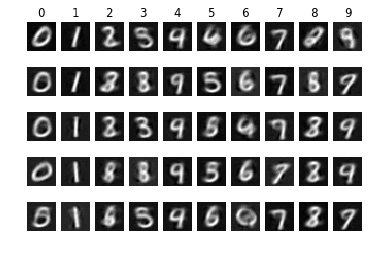

5100  0.04043  0.03958


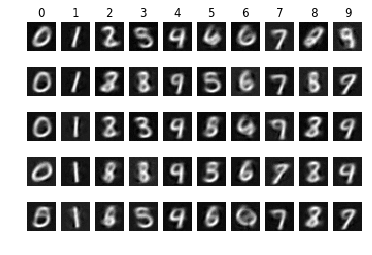

5200  0.04135  0.03959


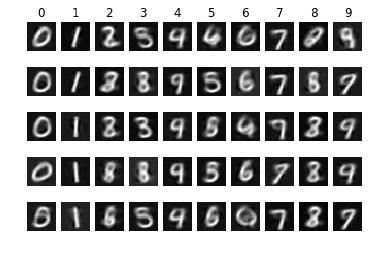

5300  0.03740  0.03957


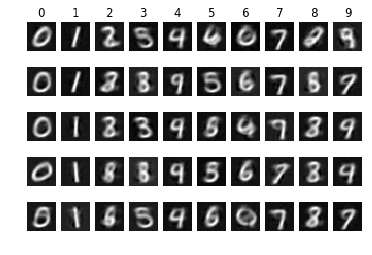

5400  0.04015  0.03946


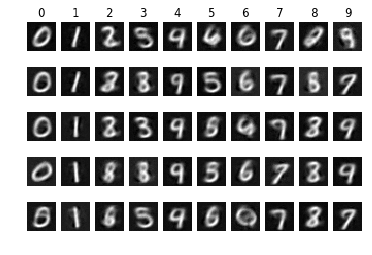

5500  0.03805  0.03935


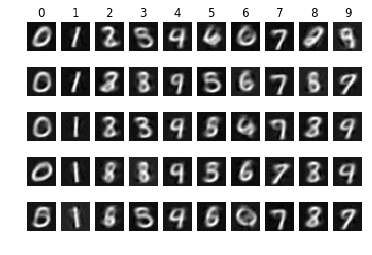

5600  0.03739  0.03930


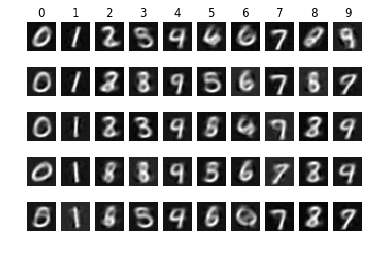

5700  0.03505  0.03917


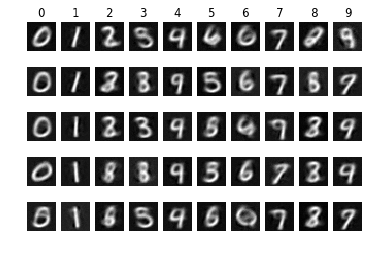

5800  0.04242  0.03919


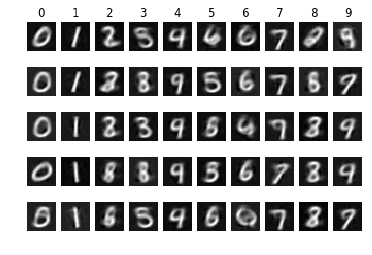

5900  0.03964  0.03906


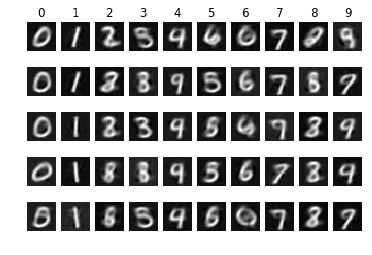

6000  0.04040  0.03901


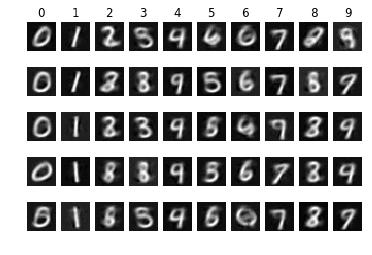

6100  0.04105  0.03889


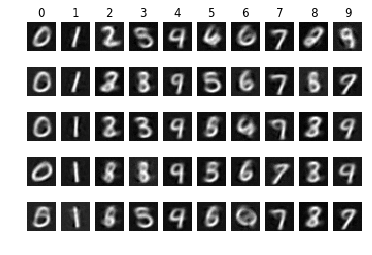

6200  0.03793  0.03893


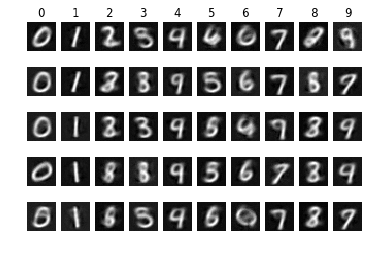

6300  0.03678  0.03885


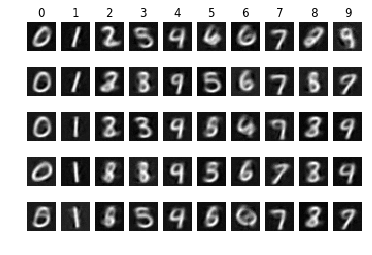

6400  0.04081  0.03889


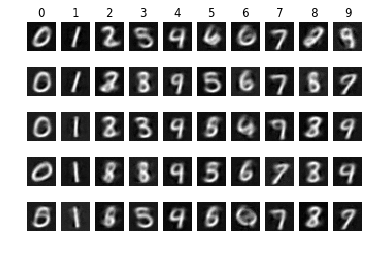

6500  0.03690  0.03875


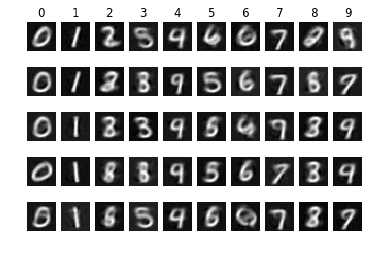

6600  0.04027  0.03866


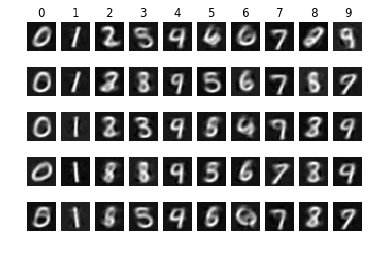

6700  0.03939  0.03858


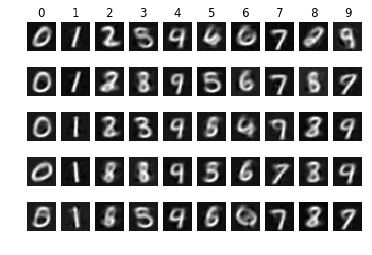

6800  0.03556  0.03862


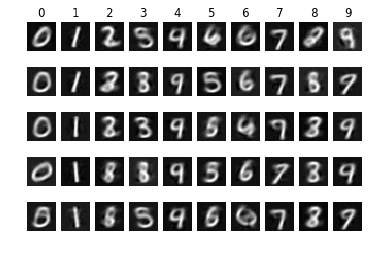

6900  0.03827  0.03850


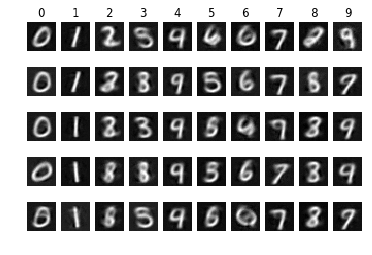

7000  0.03808  0.03837


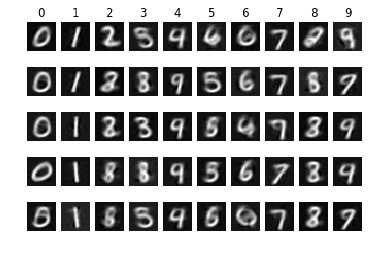

7100  0.03976  0.03835


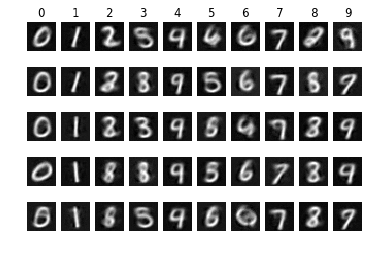

7200  0.03979  0.03828


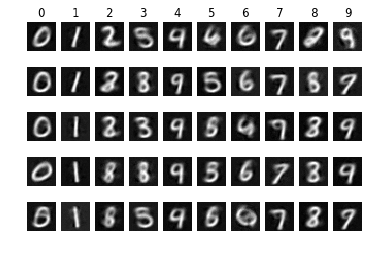

7300  0.03940  0.03842


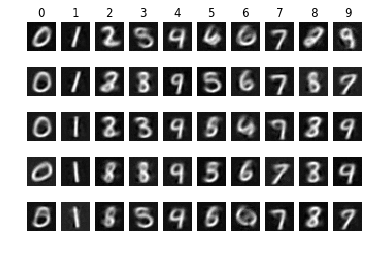

7400  0.04309  0.03824


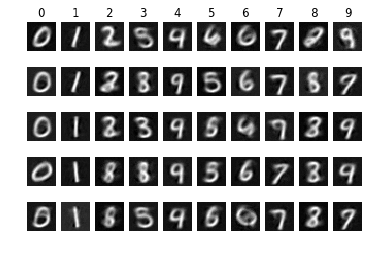

7500  0.03485  0.03819


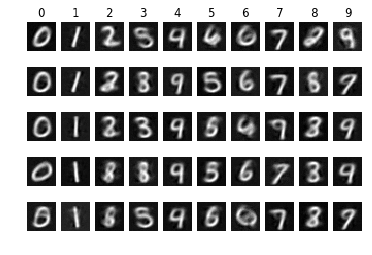

7600  0.03677  0.03820


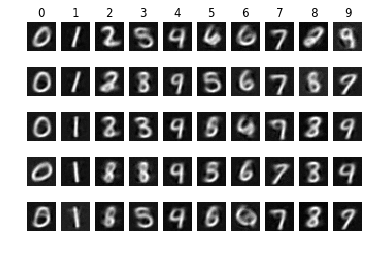

7700  0.03653  0.03817


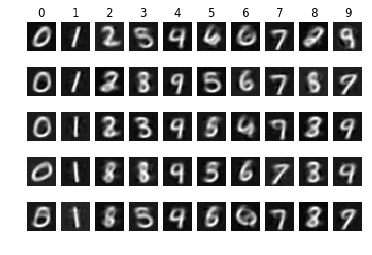

7800  0.03872  0.03803


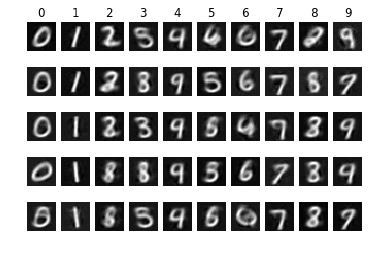

7900  0.03665  0.03803


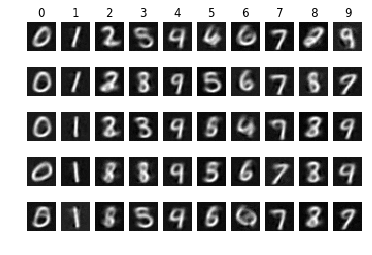

8000  0.04319  0.03801


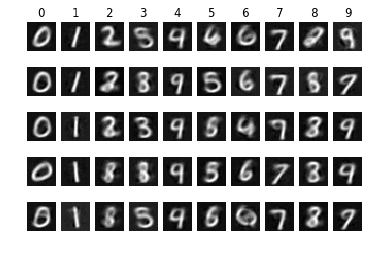

8100  0.03833  0.03792


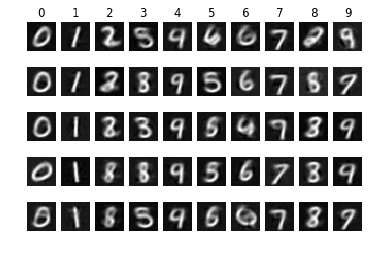

8200  0.03434  0.03782


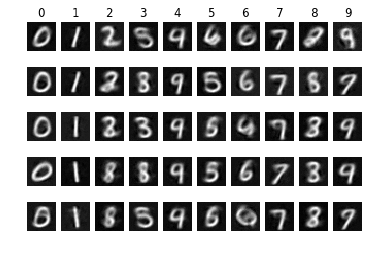

8300  0.03107  0.03779


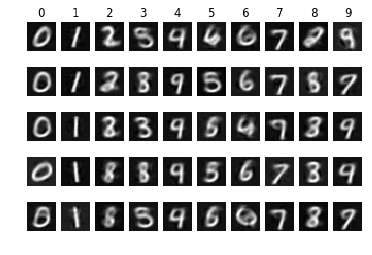

8400  0.03689  0.03783


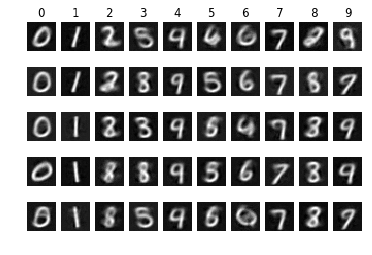

8500  0.03627  0.03773


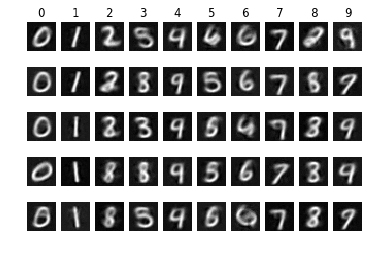

8600  0.03576  0.03764


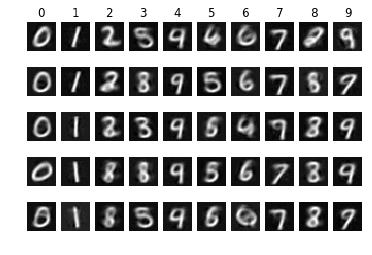

8700  0.04205  0.03764


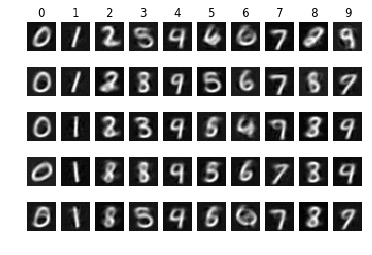

8800  0.03276  0.03757


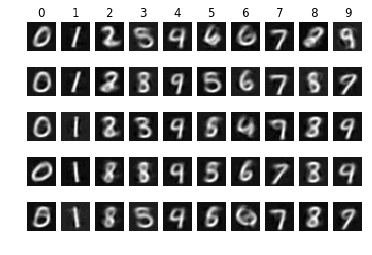

8900  0.03338  0.03752


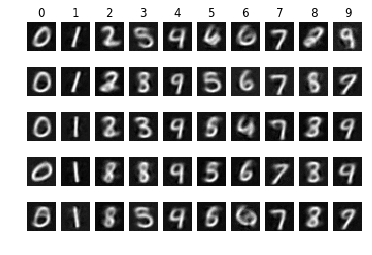

9000  0.03907  0.03746


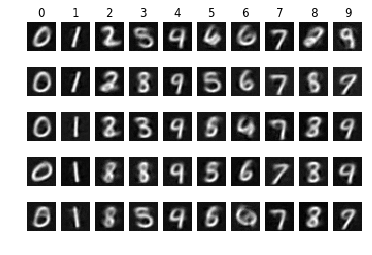

9100  0.04022  0.03743


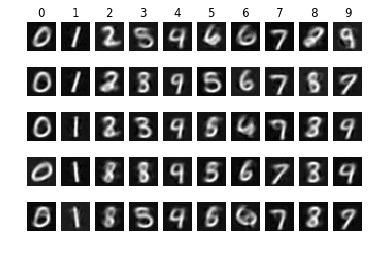

9200  0.04110  0.03747


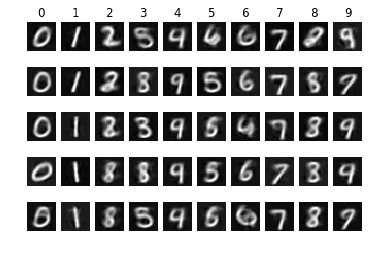

9300  0.04017  0.03734


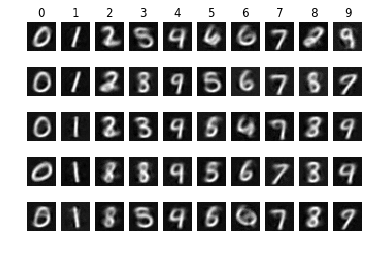

9400  0.03583  0.03736


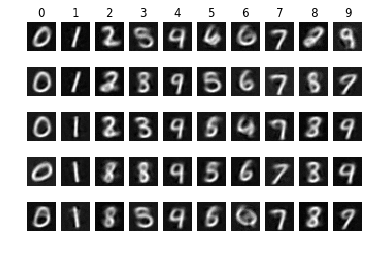

9500  0.03869  0.03730


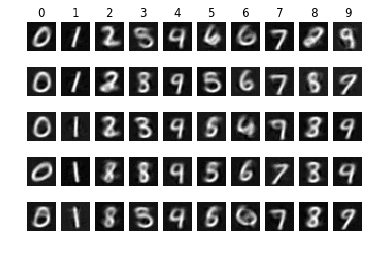

9600  0.03859  0.03723


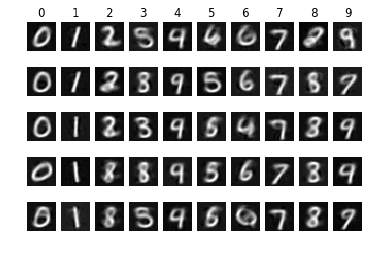

9700  0.03823  0.03720


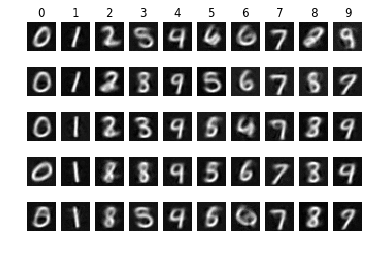

9800  0.03669  0.03728


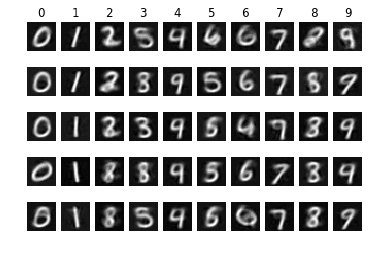

9900  0.03443  0.03717


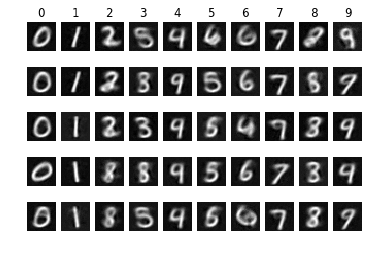

In [57]:
print('Initialising...')

input_size = 784
encode_dims = 3
hidden_size = 2000

# input layer (MNIST digit)
x = tf.placeholder("float", [None, input_size])

# encoder
encoder_w1 = weight_variable([input_size, hidden_size])
encoder_b1 = bias_variable([hidden_size])
encoder_y1 = tf.nn.relu(tf.add(tf.matmul(x, encoder_w1), encoder_b1))

encoder_w2 = weight_variable([hidden_size, hidden_size])
encoder_b2 = bias_variable([hidden_size])
encoder_y2 = tf.nn.relu(tf.add(tf.matmul(encoder_y1, encoder_w2), encoder_b2))

# encoded
encoder_w3 = weight_variable([hidden_size, encode_dims])
encoder_b3 = bias_variable([encode_dims])
z = tf.add(tf.matmul(encoder_y2, encoder_w3), encoder_b3)

# decoder
decoder_w1 = weight_variable([encode_dims, hidden_size])
decoder_b1 = bias_variable([hidden_size])
decoder_y1 = tf.nn.relu(tf.add(tf.matmul(z, decoder_w1), decoder_b1))

decoder_w2 = weight_variable([hidden_size, hidden_size])
decoder_b2 = bias_variable([hidden_size])
decoder_y2 = tf.nn.relu(tf.add(tf.matmul(decoder_y1, decoder_w2), decoder_b2))

# output (re-encoded MNIST digit)
decoder_w3 = weight_variable([hidden_size, input_size])
decoder_b3 = bias_variable([input_size])
y = tf.add(tf.matmul(decoder_y2, decoder_w3), decoder_b3)

loss = tf.losses.mean_squared_error(y, x)

train_step = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        batch = mnist.train.next_batch(50)
        train_step.run(feed_dict={x: batch[0]})
        _, loss_ = sess.run([train_step, loss], feed_dict={x: batch[0]})
        if i % 100 == 0:
            test_loss, y_ = sess.run([loss, y], feed_dict={x: mnist.test.images})
            print('{}  {:0.5f}  {:0.5f}'.format(i, loss_, test_loss))
            for i in range(10):
                image = mnist.test.images[0]
                digits = np.argmax(mnist.test.labels, 1)

                idxs = (digits == i)

                #images = mnist.test.images[idxs][0:5]
                images =y_[idxs][0:5]

                for j in range(5):   
                    plt.subplot(5, 10, i + j*10 + 1)
                    plt.imshow(images[j].reshape(28, 28), cmap='gray')
                    if j == 0:
                        plt.title(i)
                    plt.axis('off')
            plt.show()
